<a href="https://colab.research.google.com/github/alibagheribardi/Regression/blob/main/Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Let $X$ be a numerical dataset comprising $N$ observations, where each observation is characterized by $m$ numerical features, and let $y$ represent the corresponding target variable. The objective of Ordinary Least Squares (OLS) regression is to determine the coefficient vector $\beta$ that minimizes the residual error $\|X\beta - y\|$. Geometrically, the optimal coefficient vector $\beta$ is obtained by projecting $y$ onto the column space of $X$, ensuring that the residual vector $y - X\beta$ is orthogonal to this subspace. It is mathematically formulated by  

## $$X^T(X\beta - y) = 0,$$  

## which yields  

## $$\beta = (X^T X)^{-1} X^T y.$$


##Remarks.

##- In this approach, the Euclidean norm defines the notion of distance. However, various other distance metrics are commonly employed in machine learning algorithms, which may be more suitable in certain cases. These metrics are not induced by an inner product, and consequently, the concept of orthogonality does not necessarily hold. This absence poses significant challenges when formulating the coefficient vector $\beta$.
    
## Although the square matrix $X^T X$ is generally nonsingular, numerical instability can pose significant challenges, potentially compromising computational reliability. To mitigate this issue, various regularization techniques, such as Lasso and Ridge regression, are employed to enhance numerical stability and prevent ill-conditioning.  

## As a methodological refinement, one may introduce a controlled perturbation to the original dataset $X$ by defining $X_{\lambda} = X + \lambda I'$, where $\lambda$ is a nonzero scalar. Ordinary least squares (OLS) estimation is then applied to this modified dataset, with the corresponding loss function given by:


##$$
\tilde{L}(\beta, \lambda) = \| (X \beta - y)    + \lambda I'\beta\|^2.
$$

## Geometrically, this corresponds to projecting the target vector $y$ onto the hyperplane spanned by the columns of $X + \lambda I'$.

## Sufficiently small scalars $\lambda$ that ensure the numerical stability of the inverse of $X_{\lambda}^T X_{\lambda}$ lead to the following prediction:  

## $$
y_{\text{pred}} = X_\lambda\beta  ~~~~\text{where}~~~\beta = (X_\lambda^T X_\lambda)^{-1} X_\lambda^Ty
$$





In [1]:
import  numpy as np
import pandas as pd

In [28]:
import pandas as pd

# Load the dataset
Boston = pd.read_csv('BostonHousing.csv')

# Apply style to 'medv' column using applymap
styled_boston = Boston.iloc[0:10].style.applymap(lambda val: 'color: red' , subset=['medv'])

# Display the styled DataFrame
styled_boston


<ipython-input-28-8f32f2636261>:7: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_boston = Boston.iloc[0:10].style.applymap(lambda val: 'color: red' , subset=['medv'])


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2,242,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0,0.458000,7.147000,54.200000,6.062200,3,222,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0,0.458000,6.430000,58.700000,6.062200,3,222,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0,0.524000,6.012000,66.600000,5.560500,5,311,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0,0.524000,6.172000,96.100000,5.950500,5,311,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0,0.524000,5.631000,100.000000,6.082100,5,311,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0,0.524000,6.004000,85.900000,6.592100,5,311,15.200000,386.710000,17.100000,18.900000


In [ ]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
Boston.isnull().sum()
Boston.iloc[2,2]=np.NaN
Boston.isnull().sum()
Boston.head()
Boston.dropna()
Boston.info()
Boston.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   chas     505 non-null    float64
 3   nox      506 non-null    float64
 4   rm       506 non-null    float64
 5   age      506 non-null    float64
 6   dis      506 non-null    float64
 7   rad      506 non-null    int64  
 8   tax      506 non-null    int64  
 9   ptratio  506 non-null    float64
 10  b        506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


Index(['crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
Boston.drop('chas', axis=1)


,crim,zn,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


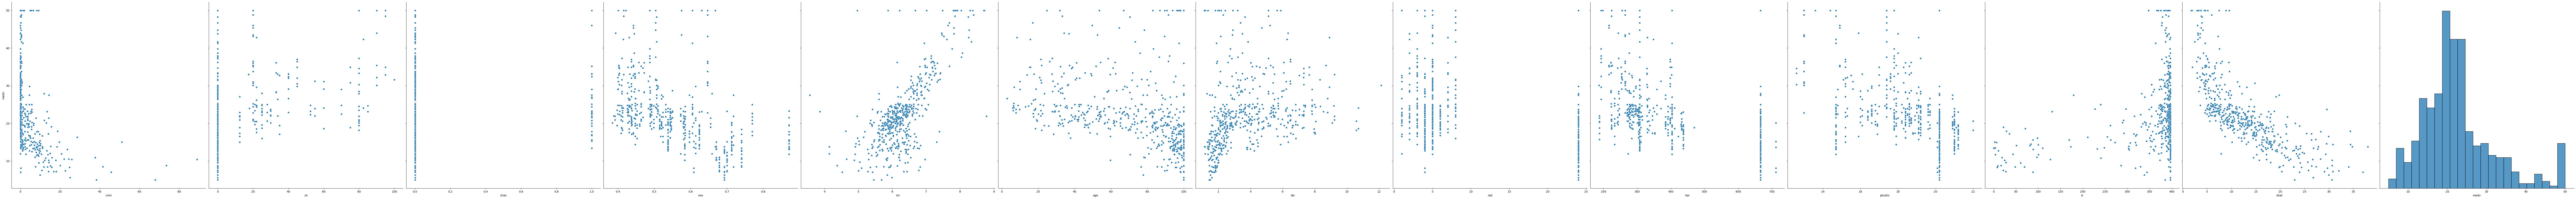

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = Boston.columns

sns.pairplot(Boston , y_vars = 'medv' , x_vars = features , height=10)
plt.show()